In [6]:
import pandas as pd
df=pd.read_csv(r'C:\Users\alurp\Downloads\AmazonFoodReviews.csv')

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df=df.iloc[:,[6,9]]

In [9]:
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [10]:
df= df.rename(columns={'Score':'Y', 'Text':'X'})

In [11]:
df=df.replace({2:1, 3:2, 4:2, 5:2})

In [12]:
df.Y

0         2
1         1
2         2
3         1
4         2
         ..
568449    2
568450    1
568451    2
568452    2
568453    2
Name: Y, Length: 568454, dtype: int64

In [13]:
df.X=df.X.str.lower()

In [14]:
import nltk 
from nltk.corpus import stopwords

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
l1 = stopwords.words('english')

In [21]:
l2= string.punctuation

In [22]:
def text_process(mess):


    nopunc = [char for char in mess if char not in l2]
    nopunc ="".join(nopunc)

    return [word for word in nopunc.split() if word not in l1]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df["X"])

In [32]:
tdm=bow_transformer.transform(df.X)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
train_x , test_x , train_y , test_y = train_test_split(tdm , df.Y , test_size = .2)

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_x , train_y)

C:\Users\alurp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
pred_test_log=logreg.predict(test_x)

In [42]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(test_y,pred_test_log)
tab1

array([[10730,  5656],
       [ 2634, 94671]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test_log))

              precision    recall  f1-score   support

           1       0.80      0.65      0.72     16386
           2       0.94      0.97      0.96     97305

    accuracy                           0.93    113691
   macro avg       0.87      0.81      0.84    113691
weighted avg       0.92      0.93      0.92    113691



In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_x, train_y)

MultinomialNB()

In [48]:
pred_test_nb=nb.predict(test_x)
tab_nb = confusion_matrix(test_y,pred_test_nb)
tab_nb

array([[10473,  5913],
       [ 5064, 92241]], dtype=int64)

In [50]:
print(classification_report(test_y,pred_test_nb))

              precision    recall  f1-score   support

           1       0.67      0.64      0.66     16386
           2       0.94      0.95      0.94     97305

    accuracy                           0.90    113691
   macro avg       0.81      0.79      0.80    113691
weighted avg       0.90      0.90      0.90    113691



# Conclusion : Highest achieved is 93 % in Logistic regression model

In [ ]:
# Word cloud  visualizations

In [32]:
import matplotlib.pyplot as plt

In [33]:
from wordcloud import WordCloud

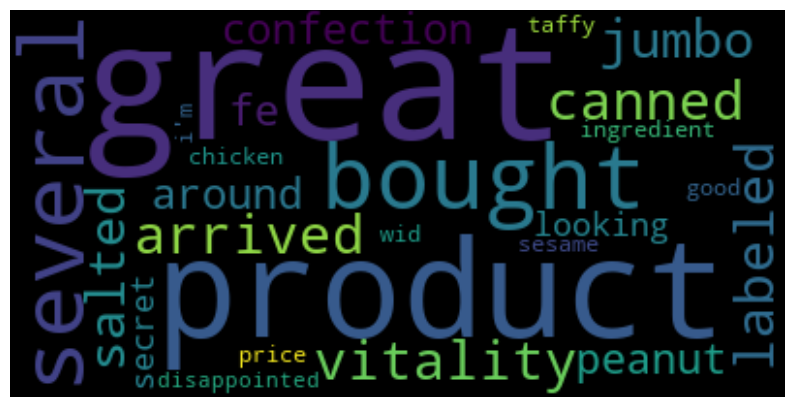

In [36]:
cloud = WordCloud(stopwords=set(stopwords.words("english")), max_words=25).generate(str(df.X))

# Plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [3]:
### Key Insights from the Word Cloud:

# 1. **Dominant Sentiment**:
#    - Words like "great," "product," and "bought" dominate, suggesting an overall positive sentiment in the dataset.

# 2. **Context**:
#    - The dataset likely relates to **product reviews**, particularly focusing on food items (e.g., "peanut," "salted," "canned").

# 3. **Positive Feedback**:
#    - Frequent use of terms like "great," "arrived," and "vitality" indicates customer satisfaction with product quality and delivery.

# 4. **Negative Aspects**:
#    - Occasional words like "disappointed" suggest some dissatisfaction, though it is less frequent.

# 5. **Focus Areas**:
#    - Topics such as **ingredients**, **labeling**, and **pricing** are recurring themes in the data. 

# Let me know if you'd like deeper insights or help with further analysis!

In [38]:
df1 = df[df.Y==1]
df2 = df[df.Y==2]


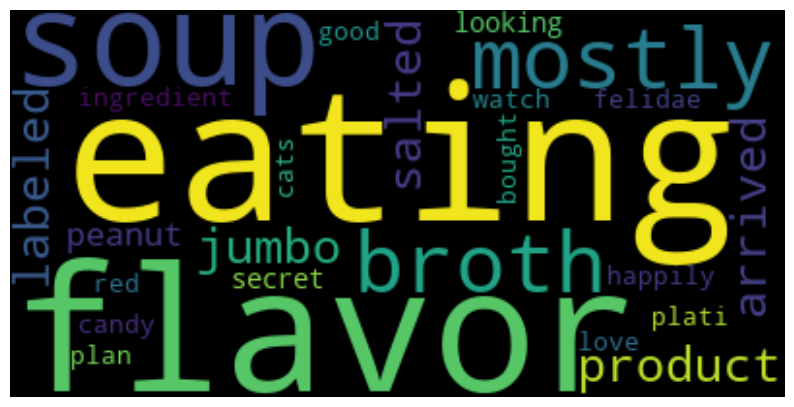

In [40]:
cloud = WordCloud(stopwords=set(stopwords.words("english")), max_words=25).generate(str(df1.X))

# Plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [2]:
# ### Key Insights:

# 1. **Top Words**:
#    - **"Eating," "flavor," "broth,"** and **"soup"** are most frequent, highlighting focus on food quality and taste.

# 2. **Moderate Mentions**:
#    - **"Salted"** and **"mostly"** suggest mixed feedback, likely on seasoning or product satisfaction.
#    - **"Arrived"** and **"happily"** reflect positive experiences with delivery or service.

# 3. **Less Frequent but Relevant**:
#    - **"Labeled"** hints at concerns with packaging or product descriptions.
#    - Specific terms like **"jumbo"** and **"peanut"** point to product size or ingredient feedback.

# ### Summary:
# Feedback revolves around taste, product quality, and logistics, with mixed sentiments on seasoning and labeling.

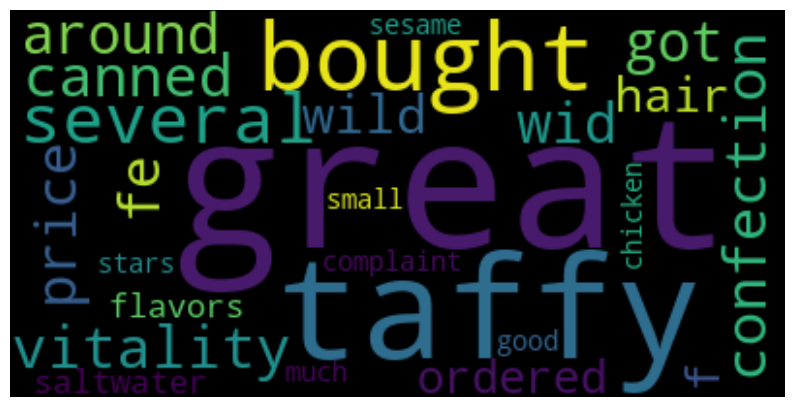

In [42]:
cloud = WordCloud(stopwords=set(stopwords.words("english")), max_words=25).generate(str(df2.X))

# Plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [1]:
# ### Key Insights:

# 1. **Prominent Words**:
#    - **"Great"**: Indicates a positive sentiment, suggesting general satisfaction with the product or experience.
#    - **"Taffy"**: Suggests the product being reviewed is a type of confectionery (saltwater taffy).
#    - **"Bought"**: Highlights purchase-related experiences or context.

# 2. **Moderately Frequent Words**:
#    - **"Vitality"** and **"several"**: May indicate variety or frequency of purchases.
#    - **"Canned"** and **"around"**: Could suggest packaging or availability as discussion points.
#    - **"Saltwater"**: Reinforces the focus on a specific type of taffy product.

# 3. **Less Frequent but Noteworthy Words**:
#    - **"Hair"** and **"complaint"**: Suggest potential negative feedback or quality concerns.
#    - **"Flavors"**: Indicates interest in or feedback about product variety.

# ### Summary:
# The feedback is primarily positive (**"great," "taffy"**) but includes potential quality or packaging concerns (**"hair," "complaint"**). The dataset reflects consumer focus on product taste, quality, and packaging.